# Wine Review - Exploratory Analysis

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

## Import DataSet

In [10]:
datafile = 'winemag-data-130k-v2.csv'

In [11]:
wine_data = pd.read_csv(datafile, index_col=0)
print("Wine Review Dataset shape: {}".format(wine_data.shape))

Wine Review Dataset shape: (129971, 13)


In [12]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [13]:
wine_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,129908,43,US,54504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,129971,119955,"Stalky aromas suggest hay and green herbs, wit...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,92506,37979,Reserve,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,129971,NaN,NaN,NaN,88.4471,3.03973,80,86,88,91,100
price,120975,NaN,NaN,NaN,35.3634,41.0222,4,17,25,42,3300
province,129908,425,California,36247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,108724,1229,Napa Valley,4480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,50511,17,Central Coast,11065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,103727,19,Roger Voss,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_twitter_handle,98758,15,@vossroger,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
wine_data = wine_data.fillna(method='bfill')

In [15]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129971 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129971 non-null  object 
 6   region_1               129971 non-null  object 
 7   region_2               129968 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129971 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [16]:
wine_data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,15.0,Sicily & Sardinia,Etna,Willamette Valley,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Willamette Valley,Willamette Valley,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",Reserve Late Harvest,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Willamette Valley,Alexander Peartree,@paulgwine,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Points and Price

In [17]:
wine_data.describe()

,points,price
count,129971.000000,129971.000000
mean,88.447138,35.493179
std,3.039730,40.563004
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


### Point Distribution

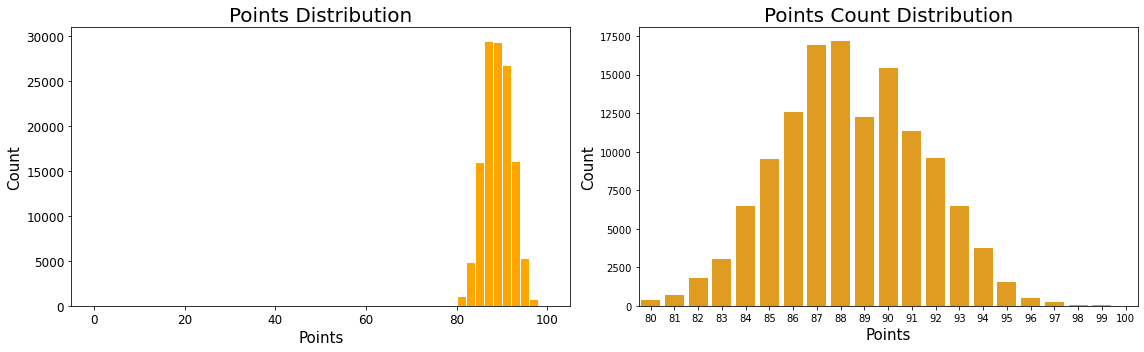

In [36]:
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
plt.hist(x=wine_data['points'], bins=50, edgecolor='white', range=[0,100], color='orange')
plt.xlabel('Points', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.tick_params(labelsize=12)
plt.title('Points Distribution', fontsize=20)

plt.subplot(1, 2, 2)
p = sns.countplot(x='points', data=wine_data, color='orange')
p.set_title("Points Count Distribution", fontsize=20)
p.set_xlabel("Points", fontsize=15)
p.set_ylabel("Count", fontsize=15)

plt.tight_layout()
plt.show()

Finding:

* The values of points are distributed between 80 and 100, because WineEnthusiast only post reviews for wines that score >=80

### Price Distribution

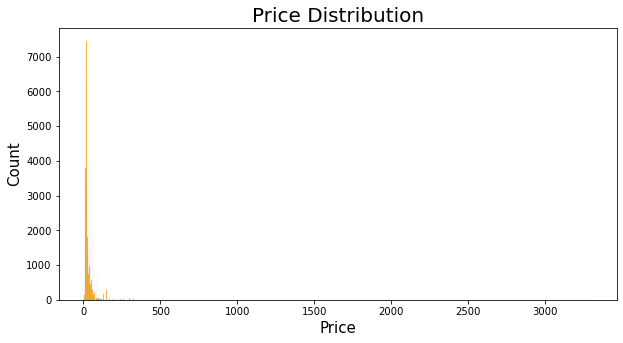

In [19]:
plt.figure(figsize=(10,5))
p = sns.histplot(wine_data['price'].dropna(), color='orange')
p.set_title("Price Distribution", fontsize=20)
p.set_xlabel("Price", fontsize=15)
p.set_ylabel("Count", fontsize=15)
plt.show()

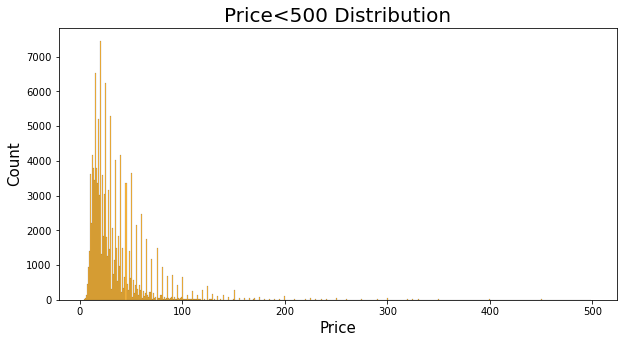

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(wine_data[wine_data['price'] < 500]['price'], color='orange')
plt.title("Price<500 Distribution", fontsize=20)
plt.xlabel("Price", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

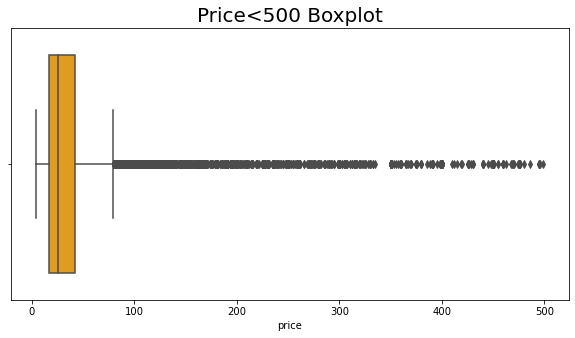

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x = wine_data[wine_data['price'] < 500]['price'], color='orange')
plt.title("Price<500 Boxplot", fontsize=20)
plt.show()

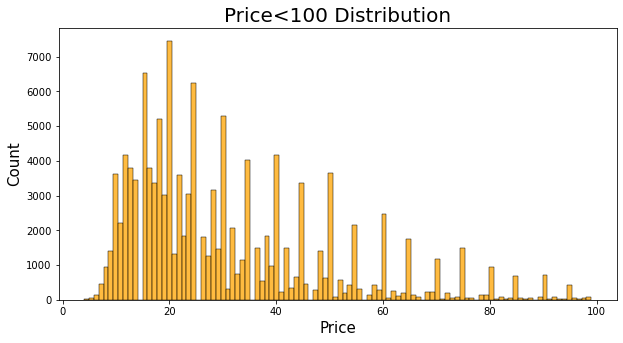

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(wine_data[wine_data['price'] < 100]['price'], color='orange')
plt.title("Price<100 Distribution", fontsize=20)
plt.xlabel("Price", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

,points,price,price_log
points,1.000000,0.418431,0.607774
price,0.418431,1.000000,0.737730
price_log,0.607774,0.737730,1.000000


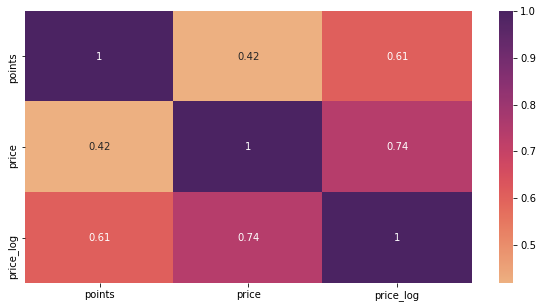

In [34]:
plt.figure(figsize=(10,5))
c= wine_data.corr()
sns.heatmap(c,cmap="flare",annot=True) #BrBG, RdGy, coolwarm
c

Findings:

* High difference in values of Price, max price is 3300, but min price is 4
* Price values are mainly distributed under 100. 
* Too much outliers in the data

### Price Distribution Against Points

In [23]:
wine_data['price_log'] = np.log(wine_data['price'])

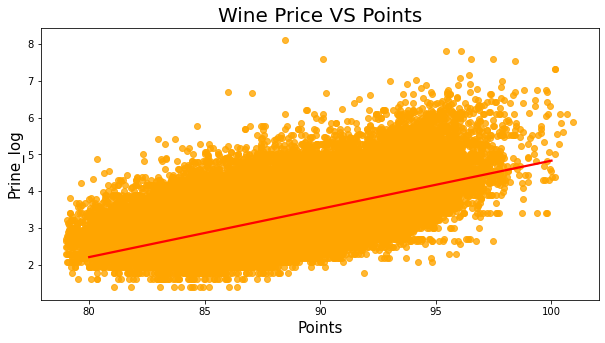

In [24]:
plt.figure(figsize=(10,5))
sns.regplot(x='points', y='price_log', data=wine_data, 
            line_kws={'color':'red'}, x_jitter=True, fit_reg=True, color='orange')
plt.title('Wine Price VS Points', fontsize=20)
plt.xlabel("Points", fontsize=15)
plt.ylabel("Prine_log", fontsize=15)
plt.show()

Findings:

* The wine with highest prices didn't score a high points, it is below 90

## Country

In [25]:
wine_data['country'].describe()

count     129971
unique        43
top           US
freq       54530
Name: country, dtype: object

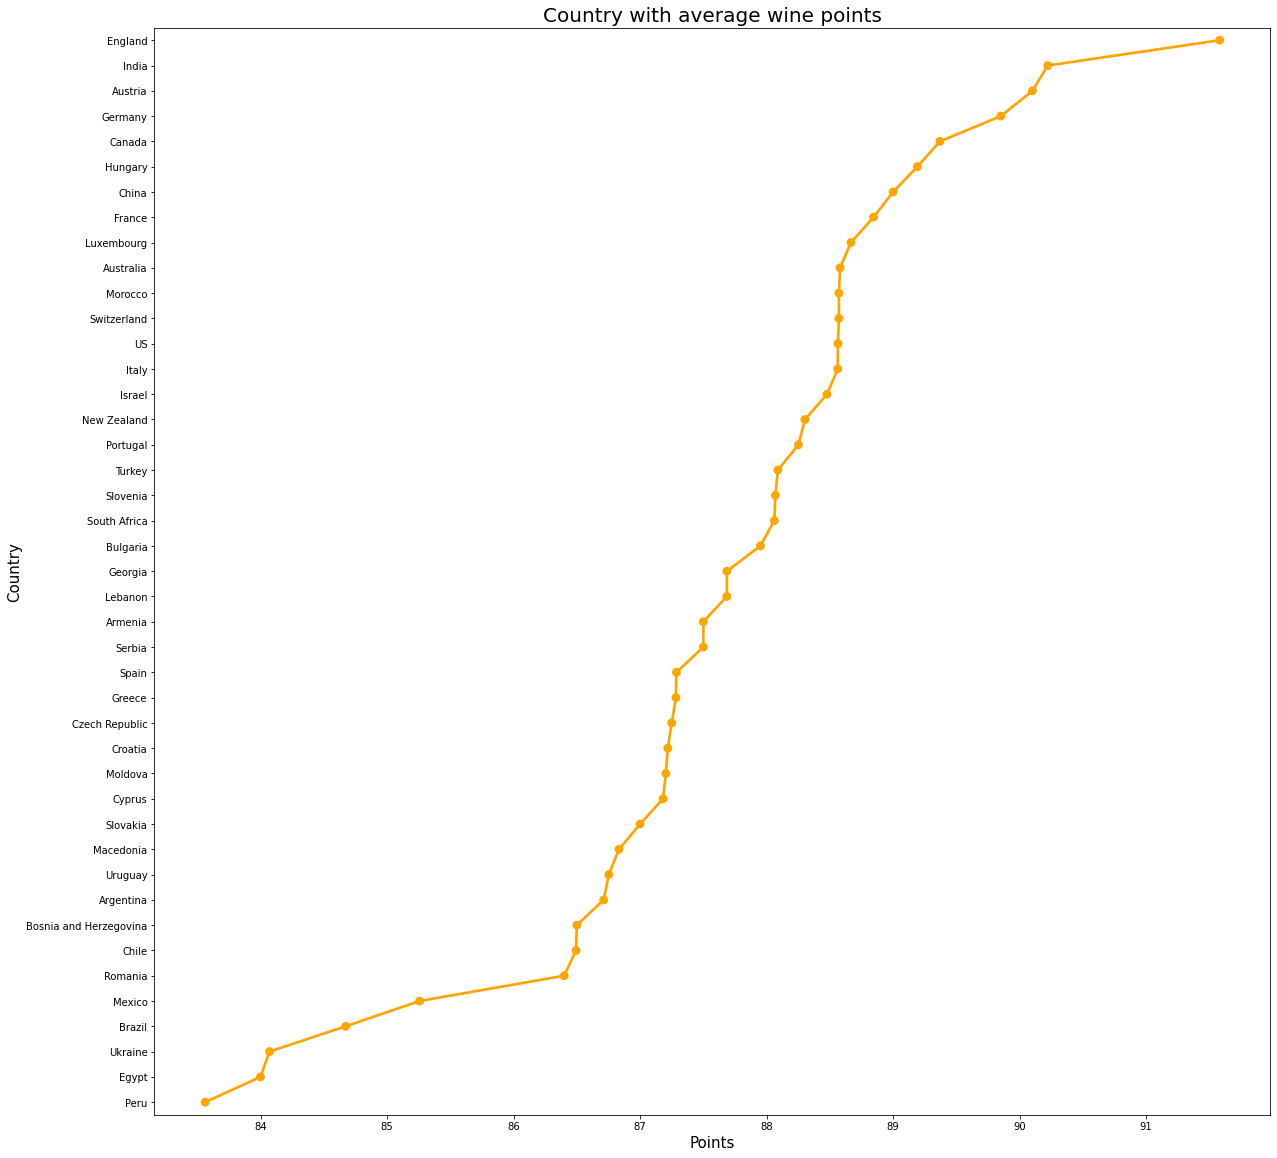

In [26]:
data = wine_data.groupby('country').mean()['points'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(20,20))
sns.pointplot(x=data['points'], y=data.index, color='orange', orient='h')
plt.title('Country with average wine points', fontsize=20)
plt.xlabel('Points', fontsize=15);
plt.ylabel('Country', fontsize=15);
plt.show()

In [27]:
data = wine_data.groupby(['country', 'province'])['points'].agg(['count','min','max','mean']).sort_values(by='mean',ascending=False)[:10]
data.reset_index(inplace=True)
data.style.background_gradient(cmap='OrRd',high=1)

,country,province,count,min,max,mean
0,Austria,Südburgenland,2,93,95,94.000000
1,Portugal,Madeira,13,86,98,93.230769
2,Germany,Mittelrhein,5,91,94,92.000000
3,Chile,Puente Alto,15,87,94,91.733333
4,Austria,Wachau,353,85,96,91.620397
5,England,England,74,89,95,91.581081
6,Chile,Santa Cruz,6,89,93,91.500000
7,Austria,Kamptal,409,85,96,91.454768
8,Austria,Traisental,43,88,94,91.255814
9,Austria,Eisenberg,16,86,95,91.187500


In [28]:
cnt = wine_data.groupby('variety')['points'].agg(['count','min','max','mean']).sort_values(by=['max','mean'],ascending=False)[:10]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='OrRd',high=1)

,variety,count,min,max,mean
0,Sangiovese Grosso,751,82,100,90.529960
1,Port,668,82,100,89.733533
2,Champagne Blend,1396,80,100,89.663324
3,Syrah,4142,80,100,89.286577
4,Bordeaux-style Red Blend,6915,80,100,89.106435
5,Portuguese Red,2466,81,100,88.810624
6,Prugnolo Gentile,43,85,100,88.720930
7,Bordeaux-style White Blend,1066,81,100,88.690432
8,Muscat,132,82,100,88.621212
9,Cabernet Sauvignon,9472,80,100,88.607580


In [29]:
cnt = wine_data.groupby(['country', 'province', 'winery'])['points'].agg(['count','min','max','mean']).sort_values(by=['max','count','mean'],ascending=False)[:10]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='OrRd',high=1)

,country,province,winery,count,min,max,mean
0,France,Champagne,Louis Roederer,45,86,100,93.266667
1,US,Washington,Cayuse,42,90,100,93.904762
2,US,Washington,Charles Smith,28,87,100,91.500000
3,France,Bordeaux,Château Léoville Las Cases,21,89,100,93.571429
4,France,Bordeaux,Château Haut-Brion,20,90,100,94.700000
5,France,Bordeaux,Château Lafite Rothschild,20,87,100,93.750000
6,Italy,Tuscany,Biondi Santi,19,87,100,92.526316
7,Australia,Victoria,Chambers Rosewood Vineyards,16,86,100,92.937500
8,Portugal,Douro,Casa Ferreirinha,15,85,100,92.066667
9,Italy,Tuscany,Avignonesi,14,85,100,91.285714


##